In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('uber.csv')

# 📝Check data

In [3]:
data.head(10)

Unnamed: 0                            key  ...  dropoff_latitude passenger_count
0    24238194    2015-05-07 19:52:06.0000003  ...         40.723217               1
1    27835199    2009-07-17 20:04:56.0000002  ...         40.750325               1
2    44984355   2009-08-24 21:45:00.00000061  ...         40.772647               1
3    25894730    2009-06-26 08:22:21.0000001  ...         40.803349               3
4    17610152  2014-08-28 17:47:00.000000188  ...         40.761247               5
5    44470845    2011-02-12 02:27:09.0000006  ...         40.755910               1
6    48725865    2014-10-12 07:04:00.0000002  ...         40.774297               5
7    44195482   2012-12-11 13:52:00.00000029  ...          0.000000               1
8    15822268   2012-02-17 09:32:00.00000043  ...         40.743537               1
9    50611056  2012-03-29 19:06:00.000000273  ...         40.775012               1

[10 rows x 9 columns]

In [4]:
data.describe()

Unnamed: 0    fare_amount  ...  dropoff_latitude  passenger_count
count  2.000000e+05  200000.000000  ...     199999.000000    200000.000000
mean   2.771250e+07      11.359955  ...         39.923890         1.684535
std    1.601382e+07       9.901776  ...          6.794829         1.385997
min    1.000000e+00     -52.000000  ...       -881.985513         0.000000
25%    1.382535e+07       6.000000  ...         40.733823         1.000000
50%    2.774550e+07       8.500000  ...         40.753042         1.000000
75%    4.155530e+07      12.500000  ...         40.768001         2.000000
max    5.542357e+07     499.000000  ...        872.697628       208.000000

[8 rows x 7 columns]

In [5]:
data[data['passenger_count']==208]

Unnamed: 0  ... passenger_count
113038    35893772  ...             208

[1 rows x 9 columns]

In [6]:
data = data.drop(data[data['passenger_count']==208].index)

In [7]:
data.describe()

Unnamed: 0    fare_amount  ...  dropoff_latitude  passenger_count
count  1.999990e+05  199999.000000  ...     199998.000000    199999.000000
mean   2.771246e+07      11.359954  ...         39.923886         1.683503
std    1.601385e+07       9.901801  ...          6.794846         1.306967
min    1.000000e+00     -52.000000  ...       -881.985513         0.000000
25%    1.382534e+07       6.000000  ...         40.733823         1.000000
50%    2.774524e+07       8.500000  ...         40.753042         1.000000
75%    4.155535e+07      12.500000  ...         40.768001         2.000000
max    5.542357e+07     499.000000  ...        872.697628         6.000000

[8 rows x 7 columns]

In [8]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
data = data.dropna()
data = data.drop(columns=['key','Unnamed: 0']).reset_index(drop=True)

In [11]:
data.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [12]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [13]:
data['year'] = data['pickup_datetime'].dt.year
data['month'] = data['pickup_datetime'].dt.month
data['day'] = data['pickup_datetime'].dt.day
data['hour'] = data['pickup_datetime'].dt.hour
data['weekday'] = data['pickup_datetime'].dt.day_name()
data['dayofweek'] = data['pickup_datetime'].dt.dayofweek

In [14]:
data

fare_amount           pickup_datetime  ...    weekday  dayofweek
0               7.5 2015-05-07 19:52:06+00:00  ...   Thursday          3
1               7.7 2009-07-17 20:04:56+00:00  ...     Friday          4
2              12.9 2009-08-24 21:45:00+00:00  ...     Monday          0
3               5.3 2009-06-26 08:22:21+00:00  ...     Friday          4
4              16.0 2014-08-28 17:47:00+00:00  ...   Thursday          3
...             ...                       ...  ...        ...        ...
199993          3.0 2012-10-28 10:49:00+00:00  ...     Sunday          6
199994          7.5 2014-03-14 01:09:00+00:00  ...     Friday          4
199995         30.9 2009-06-29 00:42:00+00:00  ...     Monday          0
199996         14.5 2015-05-20 14:56:25+00:00  ...  Wednesday          2
199997         14.1 2010-05-15 04:08:00+00:00  ...   Saturday          5

[199998 rows x 13 columns]

# 📊Analysis condition of uber hash data

## Visualisation hash month

Text(0, 0.5, 'Count of uber usage')

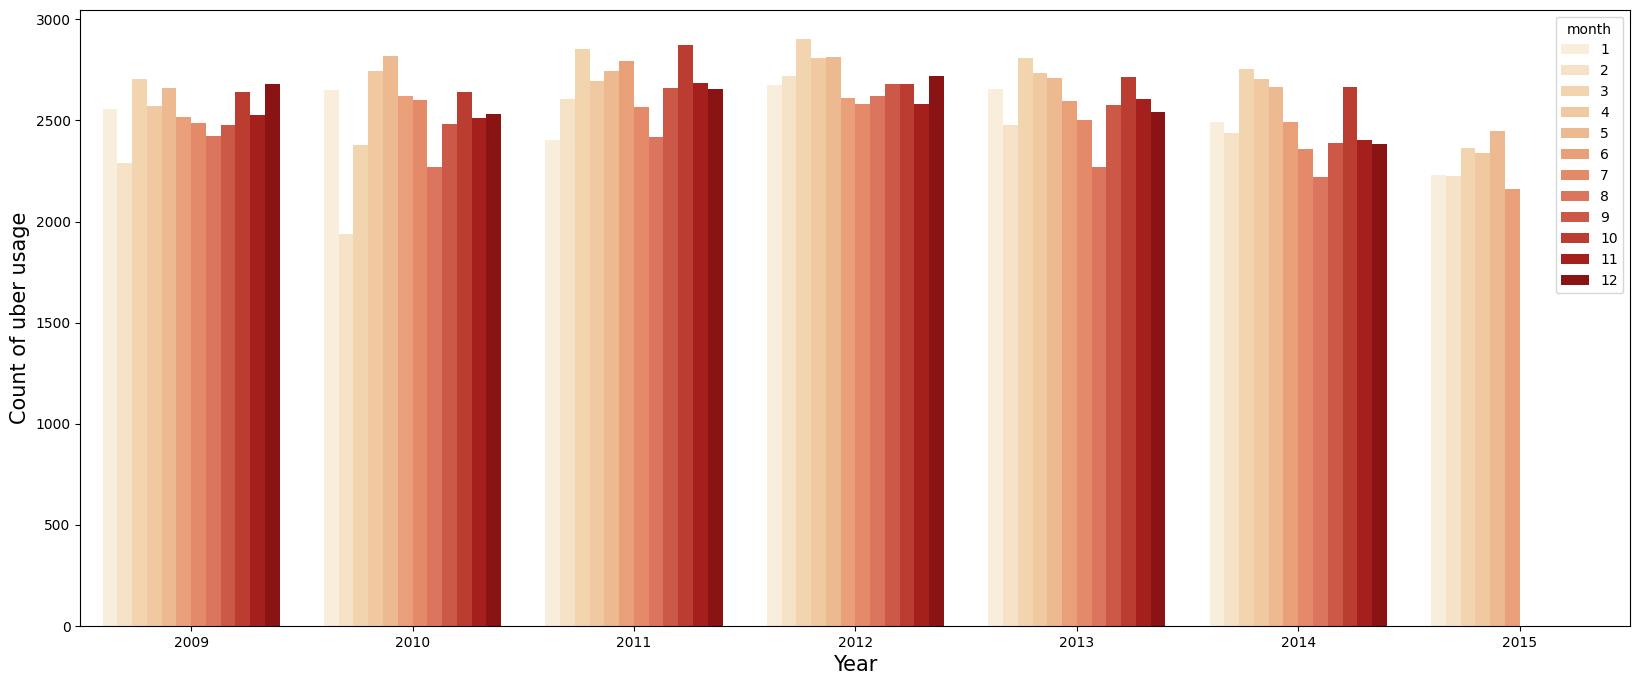

In [15]:
fig = plt.figure(figsize=(20,8))
sns.countplot(x='year',data=data, palette='OrRd',hue='month')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count of uber usage',fontsize=15)

In [16]:
data_year = data['year'].unique()

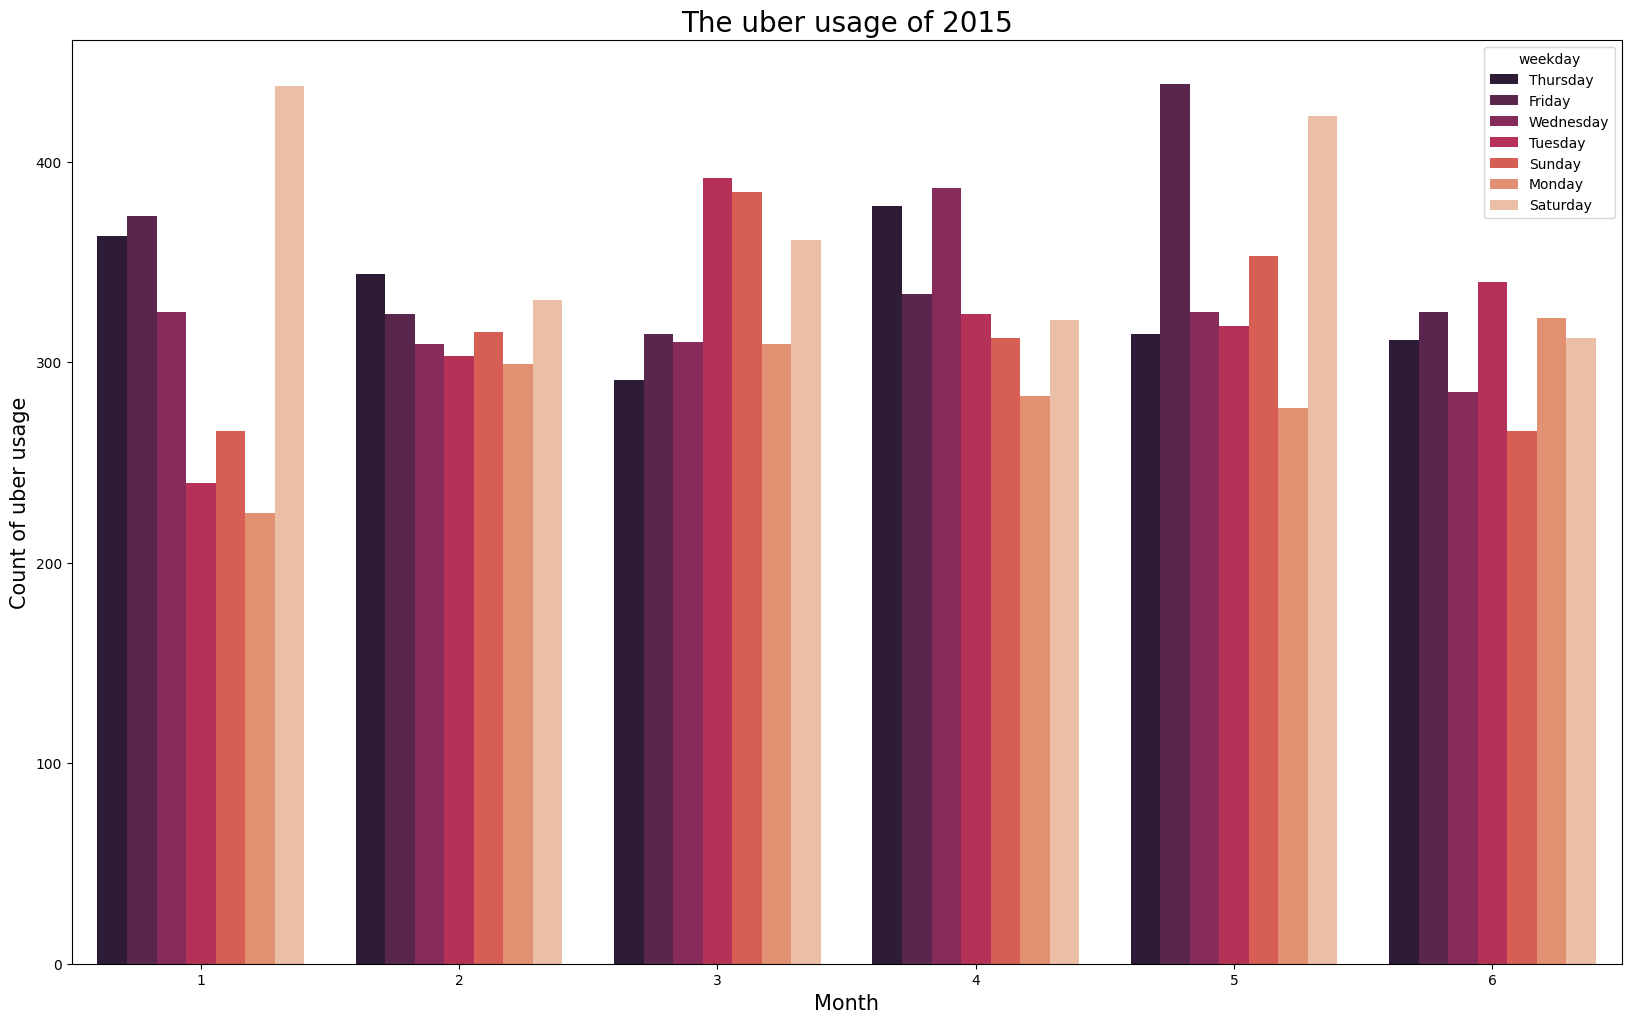

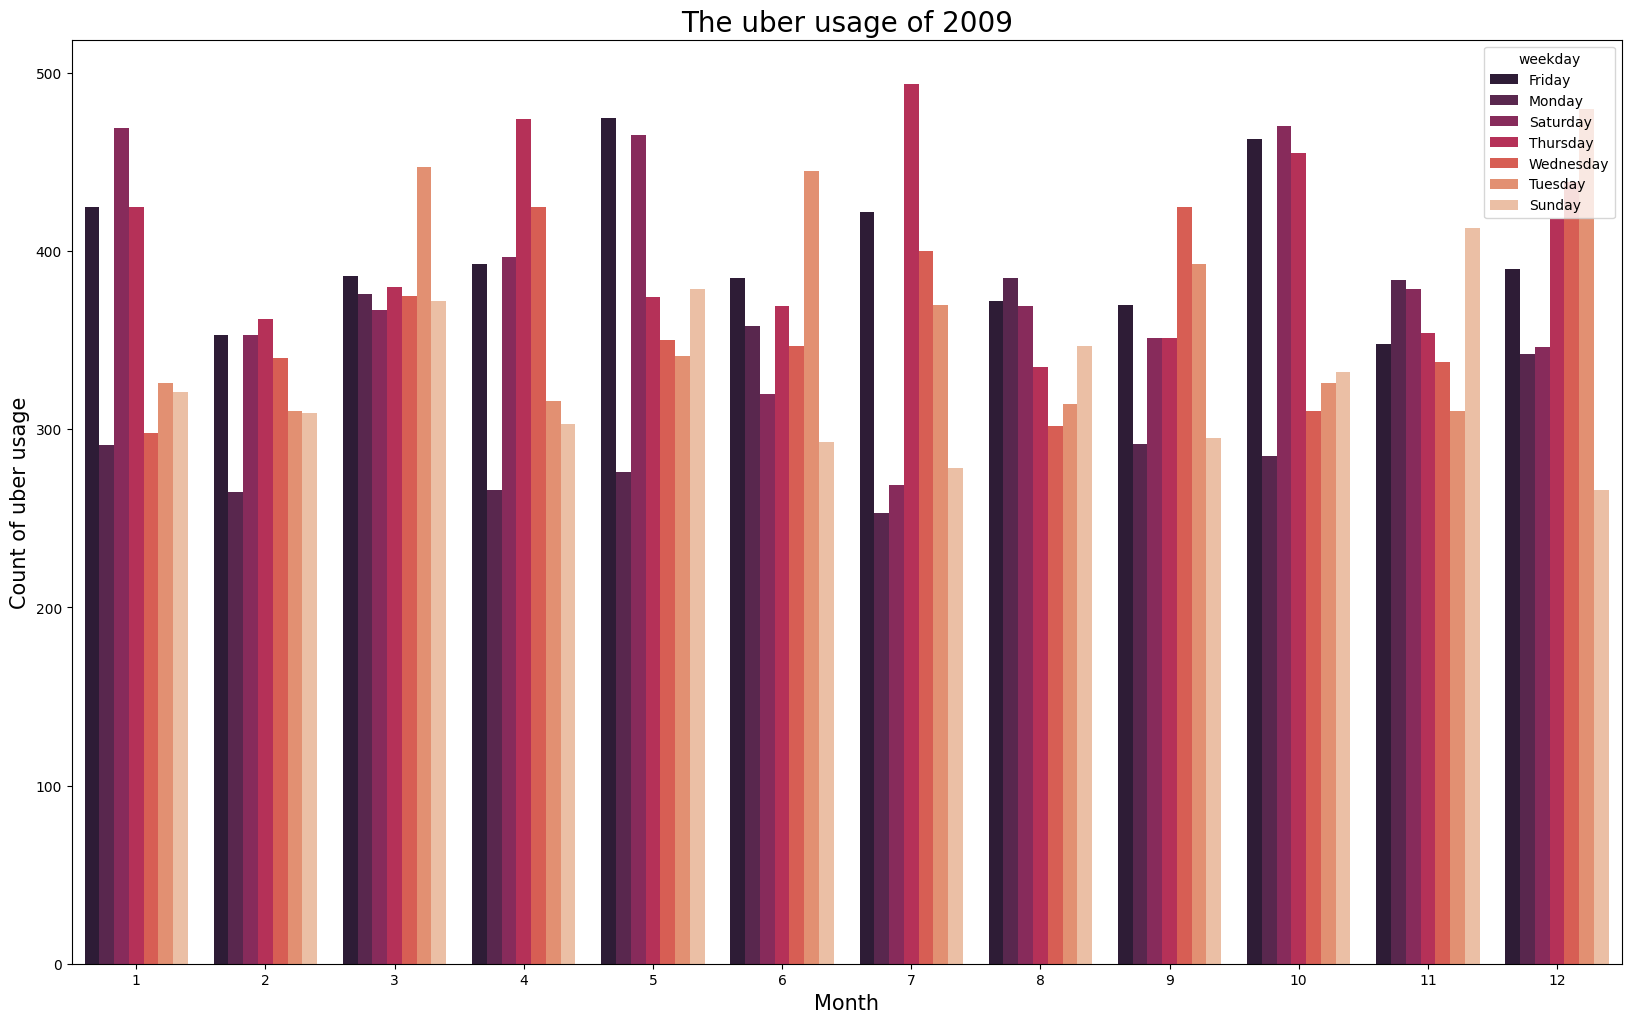

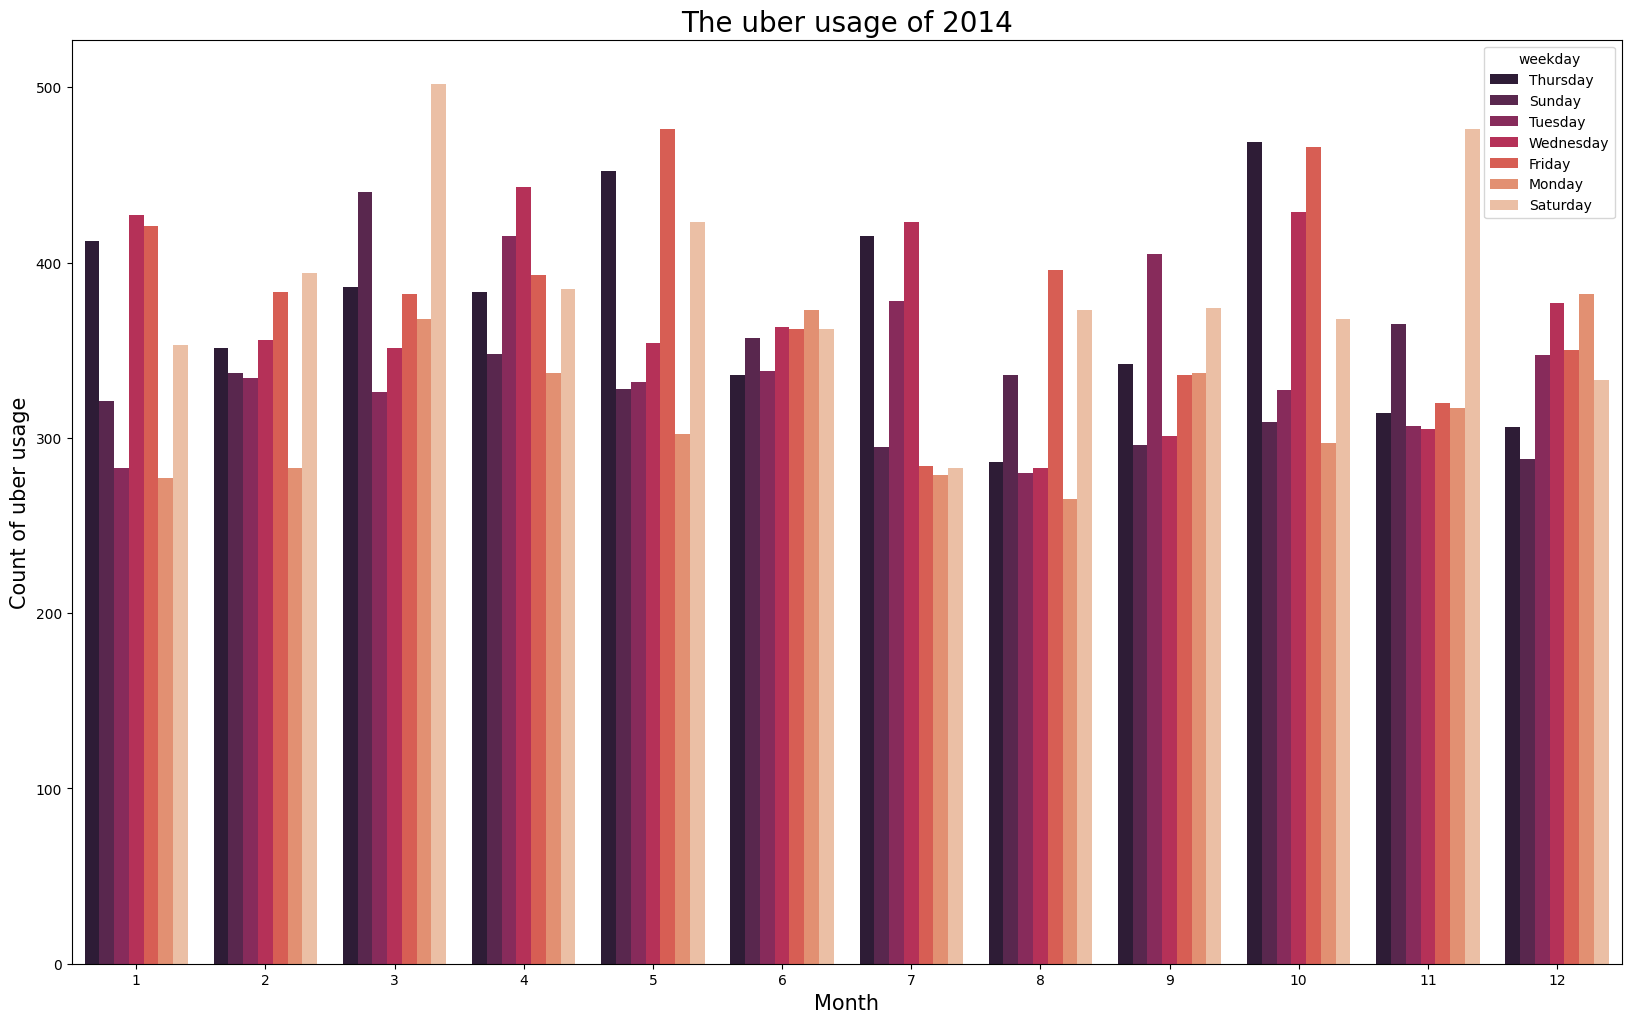

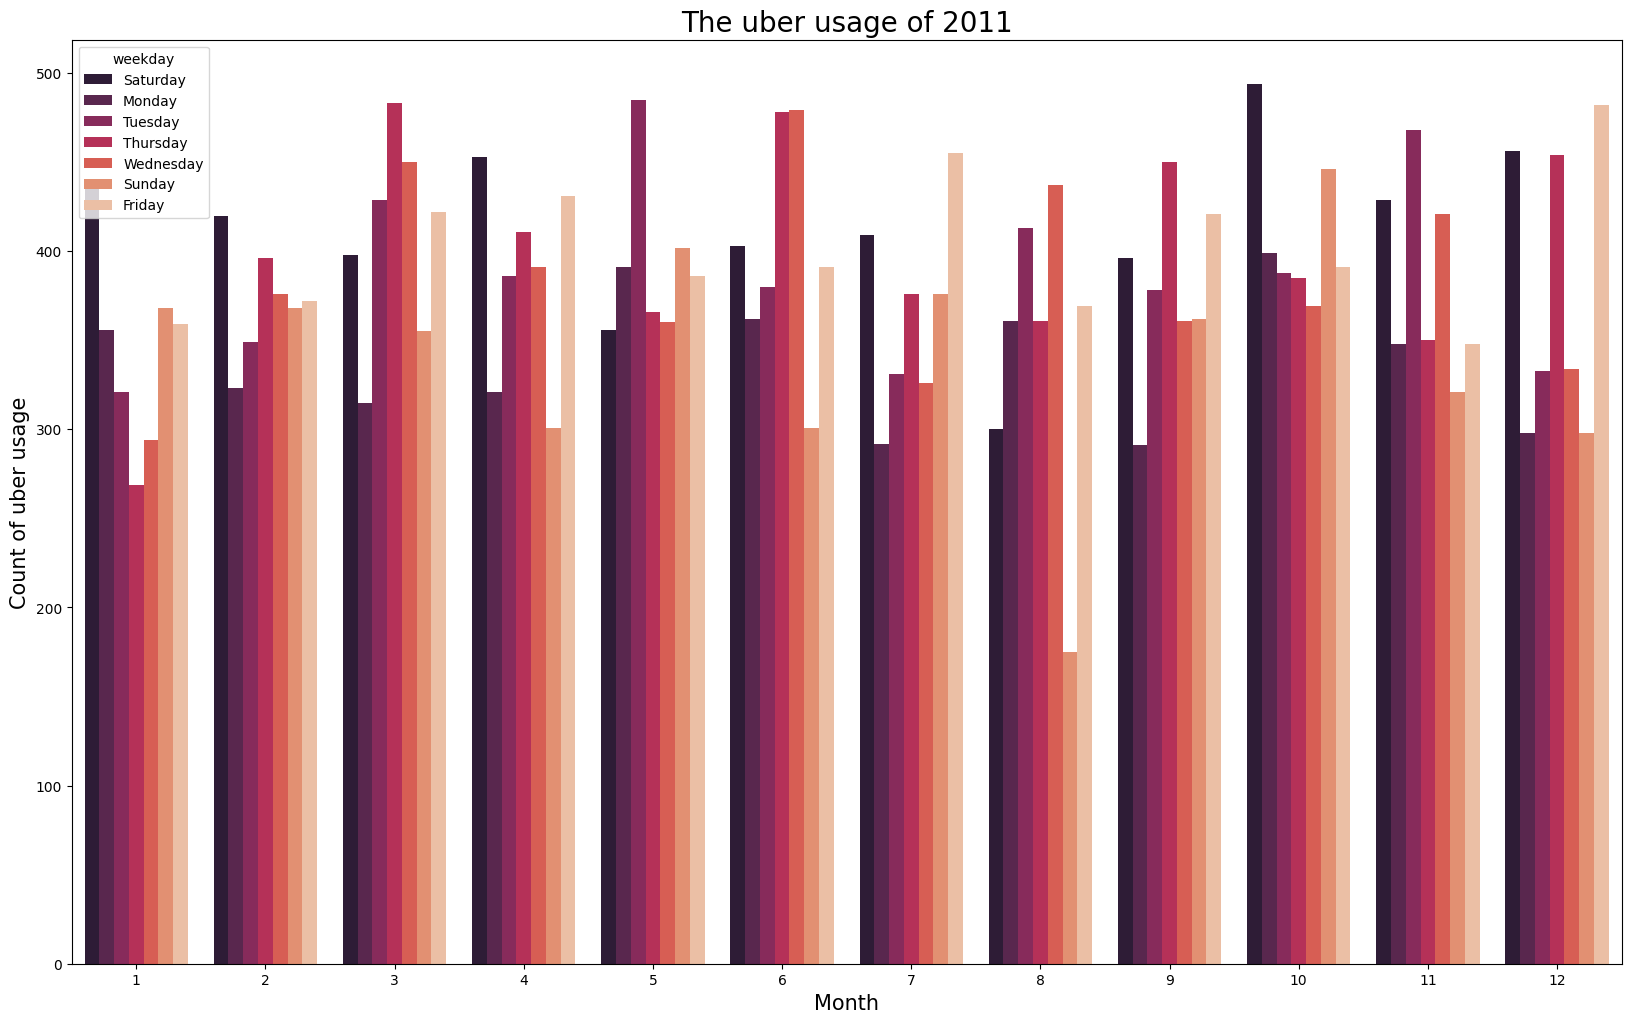

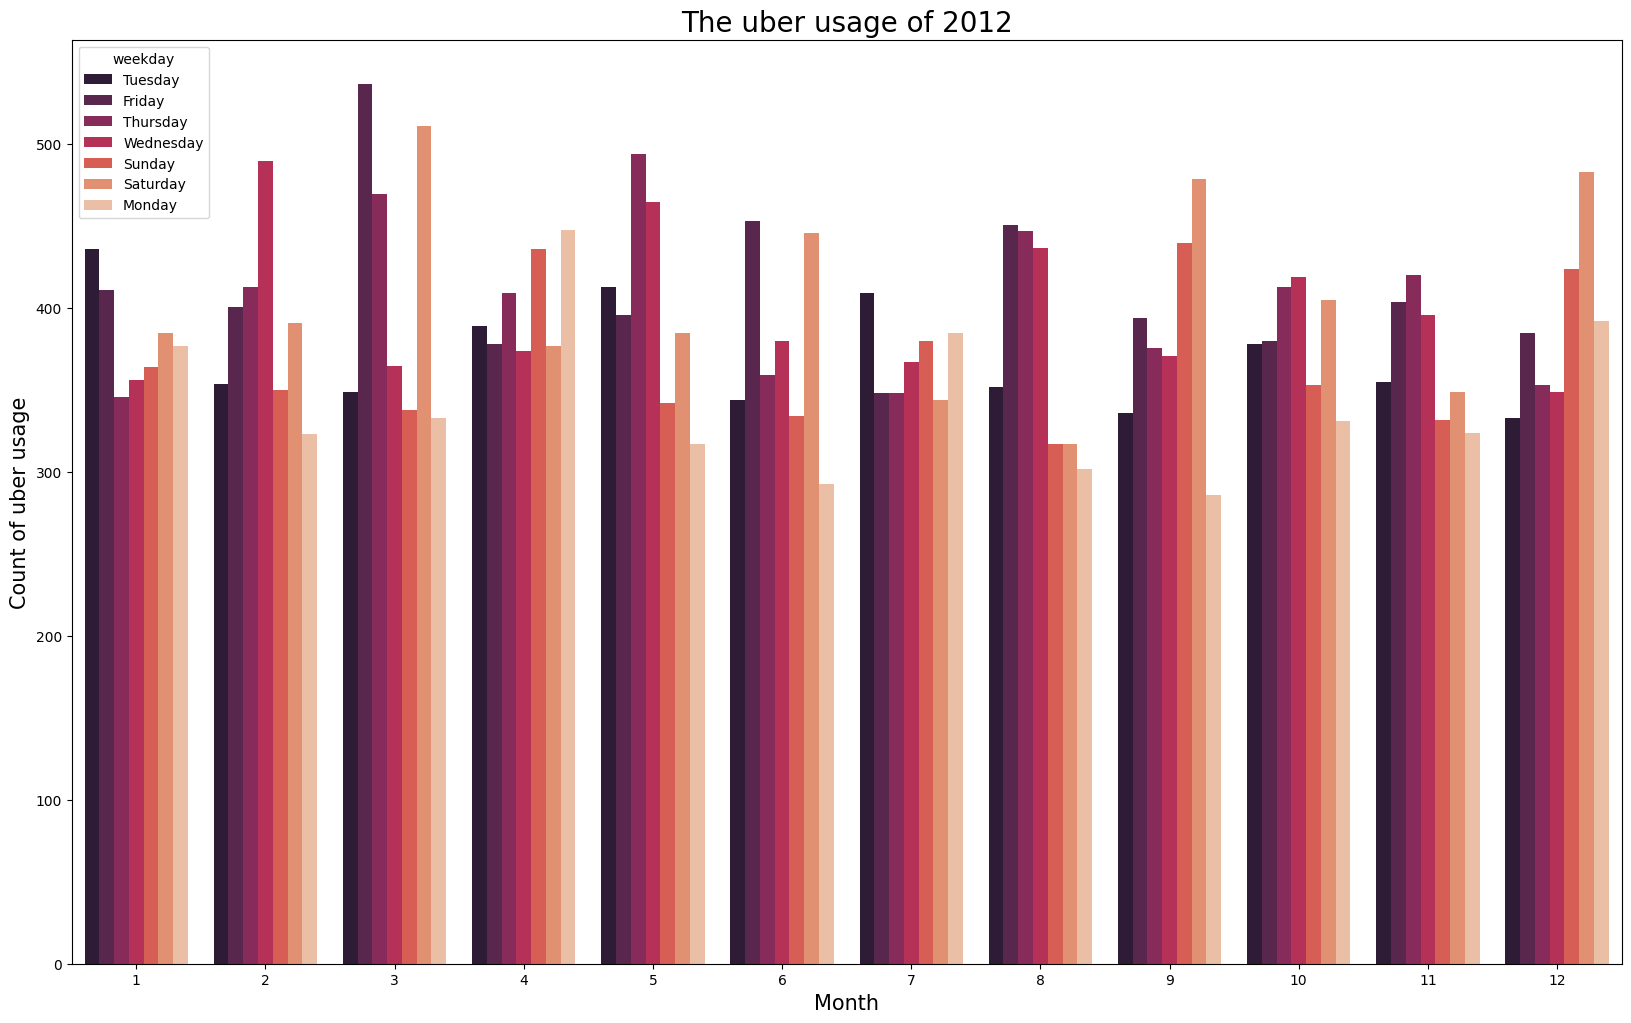

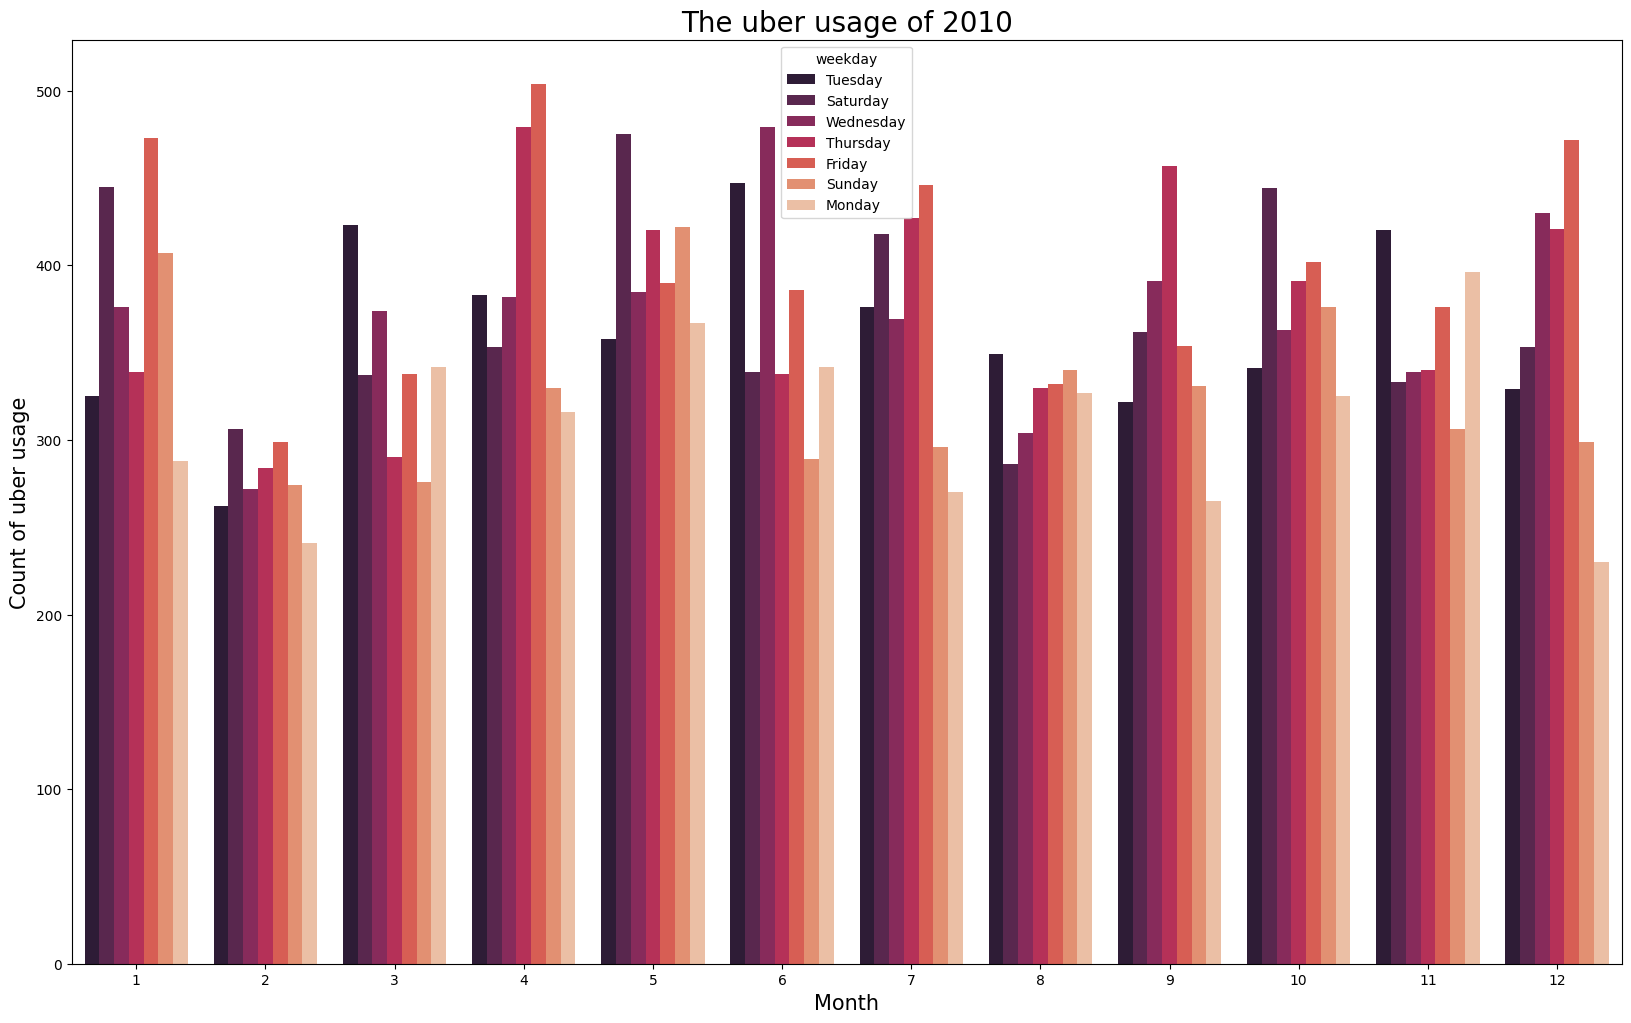

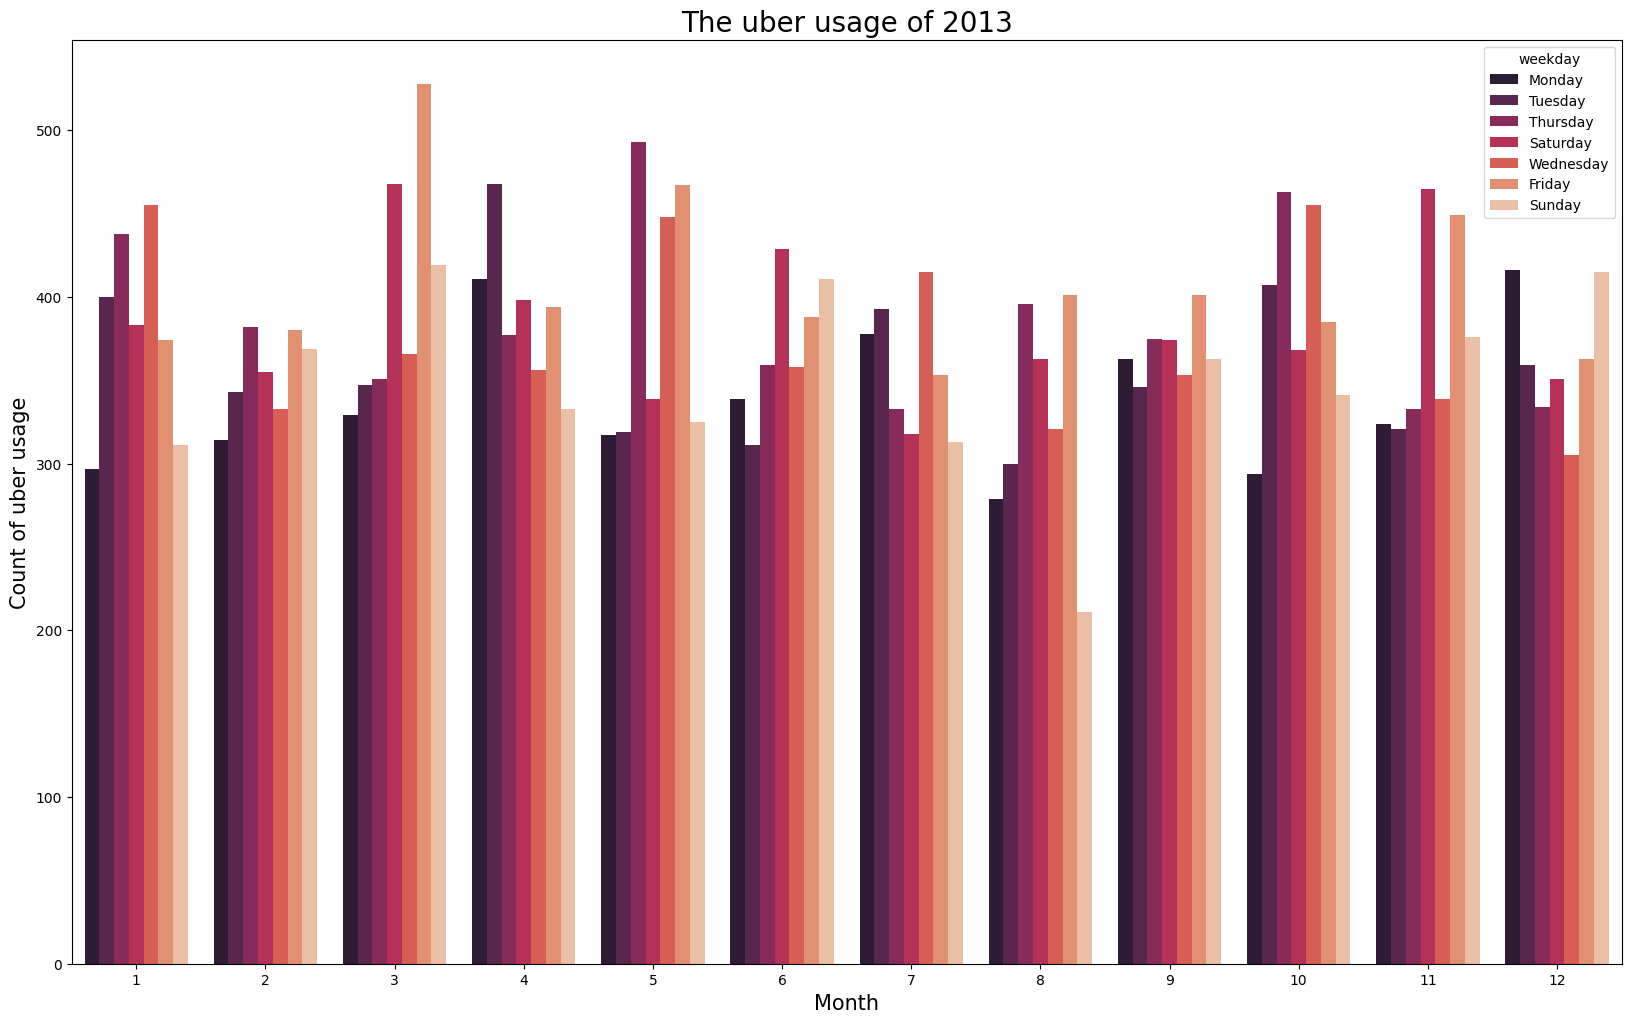

In [17]:
for year in data_year:
    year_data = data[data['year']==year]
    fig = plt.figure(figsize=(20,12))
    sns.countplot(x='month',data=year_data, palette='rocket',hue='weekday')
    plt.xlabel('Month',fontsize=15)
    plt.ylabel('Count of uber usage',fontsize=15)
    plt.title('The uber usage of {}'.format(year), fontsize=20)

## Analysis hourly rush on all days

In [18]:
hourly_data = data.groupby(['weekday','hour'], as_index=False).size()
hourly_data.head()

weekday  hour  size
0  Friday     0  1258
1  Friday     1   855
2  Friday     2   571
3  Friday     3   426
4  Friday     4   313

Text(0.5, 1.0, 'Uber usage of rush hour in weekdays')

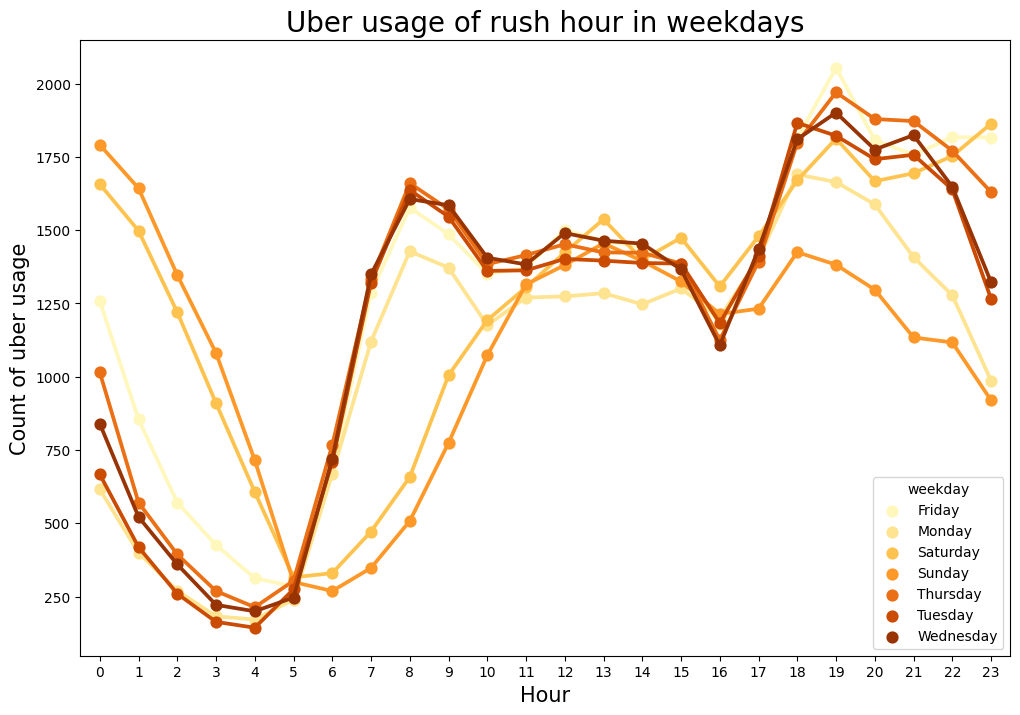

In [19]:
plt.figure(figsize=(12,8))
sns.pointplot(x='hour',y='size',hue='weekday', data=hourly_data,palette='YlOrBr')
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Count of uber usage',fontsize=15)
plt.title('Uber usage of rush hour in weekdays', fontsize=20)

## Analysis passenager distribution

In [20]:
passenger_count = data['passenger_count'].value_counts()
passenger_count

1    138425
2     29428
5     14009
3      8881
4      4276
6      4271
0       708
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Distribution of passengers')

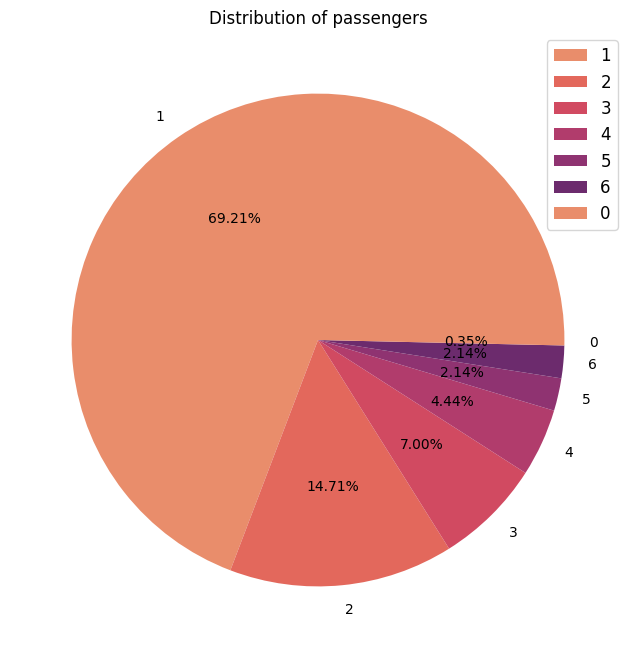

In [21]:
fig = plt.figure(figsize=(18,8))
colors = sns.color_palette('flare')
labels=[1,2,3,4,5,6,0]
plt.pie(passenger_count,labels=labels, colors=colors, autopct='%.2f%%')
plt.legend(fontsize=12)
plt.title('Distribution of passengers')

In [22]:
data.head(5)

fare_amount           pickup_datetime  ...   weekday  dayofweek
0          7.5 2015-05-07 19:52:06+00:00  ...  Thursday          3
1          7.7 2009-07-17 20:04:56+00:00  ...    Friday          4
2         12.9 2009-08-24 21:45:00+00:00  ...    Monday          0
3          5.3 2009-06-26 08:22:21+00:00  ...    Friday          4
4         16.0 2014-08-28 17:47:00+00:00  ...  Thursday          3

[5 rows x 13 columns]

## Map of pick up rush location

In [23]:
map_data = data.groupby(['pickup_longitude','pickup_latitude'], as_index=False).size()

In [24]:
import folium

from folium.plugins import HeatMap

In [25]:
basemap = folium.Map()
HeatMap(map_data).add_to(basemap)

In [26]:
basemap


## Examine rush on Month and Day

In [27]:
month_pivot = data.groupby(['month','day']).size().unstack()
month_pivot.style.background_gradient()

<AxesSubplot: xlabel='day', ylabel='day'>

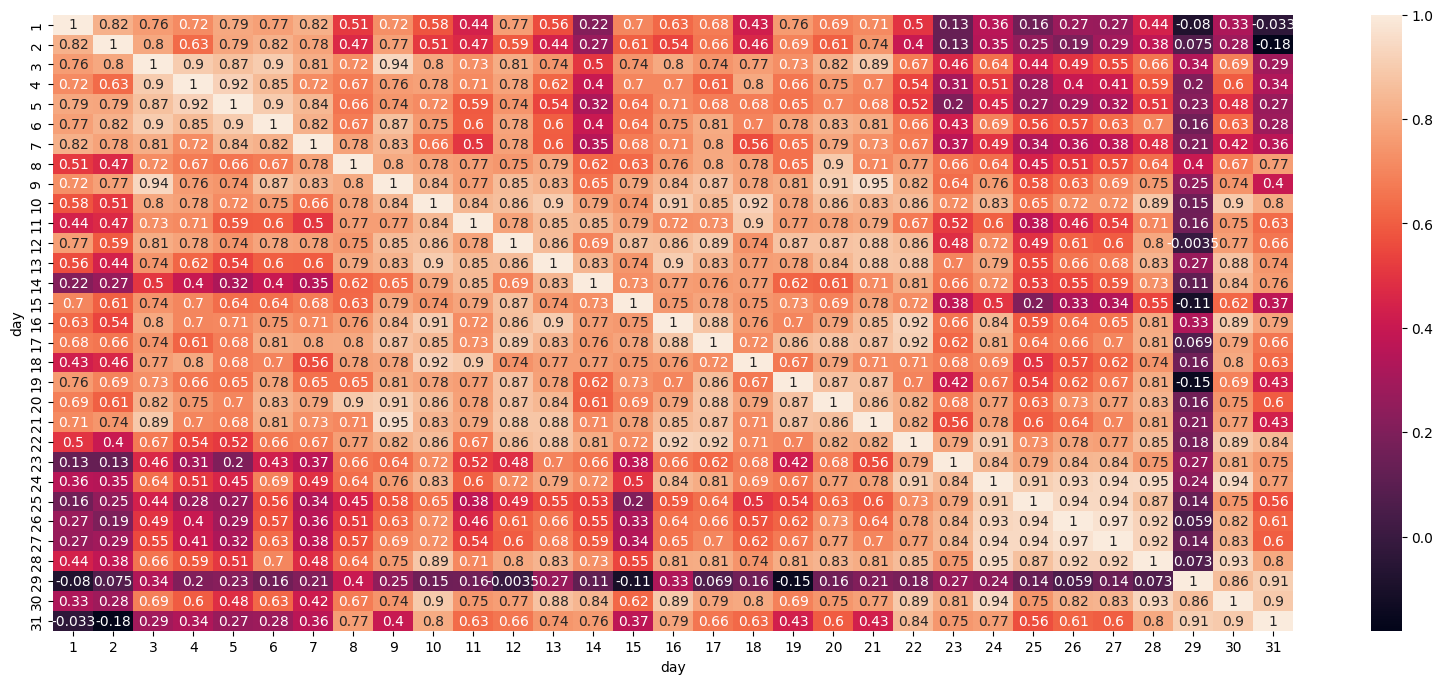

In [28]:
fig = plt.figure(figsize=(20,8))
month_pivot = data.groupby(['month','day']).size().unstack()
sns.heatmap(month_pivot.corr(),annot = True)

## Examine rush on Day and Hour

In [29]:

day_pivot = data.groupby(['day','hour']).size().unstack()
day_pivot.style.background_gradient(cmap='YlOrRd')

<AxesSubplot: >

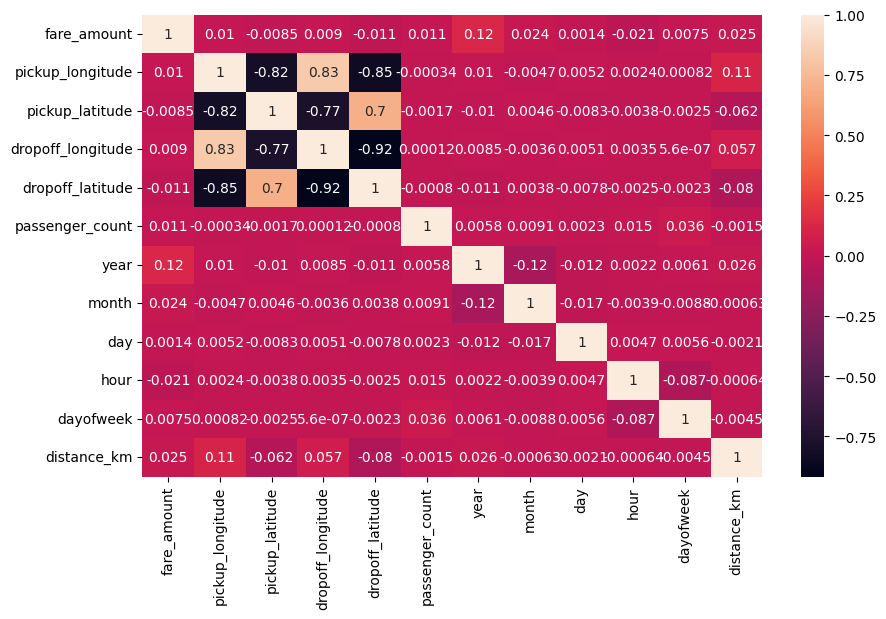

In [49]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(data.corr(),annot = True)

# 📈Predict price of uber

## Calculate distance of uber route

In [30]:
from math import radians, cos, sin, asin, sqrt

In [31]:
def calculate_distance(pickup_lon, pickup_lat, drop_lon, drop_lat):
    uber_distance = []
    for i in range(len(pickup_lon)):
        lon1, lan1, lon2, lan2 = map(radians, [pickup_lon[i], pickup_lat[i], drop_lon[i], drop_lat[i]])
        distance_lon = lon2 - lon1
        distance_lan = lan2 - lan1
        a = sin(distance_lan/2) ** 2 + cos(lan1) * cos(lan2) *sin(distance_lon/2) ** 2
        c = 2 * asin(sqrt(a)) * 6371
        uber_distance.append(c)
    return uber_distance

In [32]:
data['distance_km'] = calculate_distance(data.pickup_longitude.to_numpy(), data.pickup_latitude.to_numpy(), data.dropoff_longitude.to_numpy(), data.dropoff_latitude.to_numpy())

In [33]:
data.head(4)

fare_amount           pickup_datetime  ...  dayofweek  distance_km
0          7.5 2015-05-07 19:52:06+00:00  ...          3     1.683323
1          7.7 2009-07-17 20:04:56+00:00  ...          4     2.457590
2         12.9 2009-08-24 21:45:00+00:00  ...          0     5.036377
3          5.3 2009-06-26 08:22:21+00:00  ...          4     1.661683

[4 rows x 14 columns]

## Collect training datset and test dataset

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
data_x = data.drop('fare_amount', axis=1)
data_x = data_x.drop('pickup_datetime', axis=1)
data_x = data_x.drop('weekday', axis=1)
data_y = data['fare_amount']

In [36]:
data_x

pickup_longitude  pickup_latitude  ...  dayofweek  distance_km
0             -73.999817        40.738354  ...          3     1.683323
1             -73.994355        40.728225  ...          4     2.457590
2             -74.005043        40.740770  ...          0     5.036377
3             -73.976124        40.790844  ...          4     1.661683
4             -73.925023        40.744085  ...          3     4.475450
...                  ...              ...  ...        ...          ...
199993        -73.987042        40.739367  ...          6     0.112210
199994        -73.984722        40.736837  ...          4     1.875050
199995        -73.986017        40.756487  ...          0    12.850319
199996        -73.997124        40.725452  ...          2     3.539715
199997        -73.984395        40.720077  ...          5     5.417783

[199998 rows x 11 columns]

In [37]:
data_y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199993     3.0
199994     7.5
199995    30.9
199996    14.5
199997    14.1
Name: fare_amount, Length: 199998, dtype: float64

In [43]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

## Set up regression model

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [45]:
y_pred = reg.predict(x_test)
y_pred

array([11.5367034 , 12.632941  , 11.99510703, ..., 10.29279634,
       11.36655089, 11.44532323])

In [46]:
y_test

160007    10.0
71744      5.0
73997      8.0
65511      5.3
164935    17.3
          ... 
118980    15.7
130230     6.1
80421      8.1
77884      6.9
67725      9.7
Name: fare_amount, Length: 60000, dtype: float64

In [47]:
cols = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)
from sklearn import metrics 
from sklearn.metrics import r2_score 

reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
reg_squared = r2_score(y_test, y_pred)

full_metrics = pd.Series({'Model': "Linear Regression", 'RMSE' : reg_RMSE, 'R-Squared' : reg_squared})
result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      RMSE  R-Squared
0  Linear Regression  9.750295   0.016495